<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [56]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
# A:
df = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
# Basic EDA can be summed down to:
# Source: https://en.wikipedia.org/wiki/Exploratory_data_analysis#:~:text=In statistics%2C exploratory data analysis,modeling or hypothesis testing task.&text=EDA encompasses IDA.

# First Initial Data Analysis (IDA):

# Answer these 4 questions:

# Check the quality of data

# Check the quality of measurments

# Do any type of initial transformations

# Did the collected data fufill the intentions of the research design
## Eg: background and substantive variables are equally distributed within and across groups.
## Eg: check the success of the non-random sampling, by Checking if all subgroups in population are represented
## Eg: check for dropout

# Then EDA:
# Summarize their main characteristics, often with visual methods
# EDA is mostly seeing what data can tell the user beyond formal modeling or hypothesis testing 
# 
# Typical Graphical EDA: 
# Boxplot, Histogram, Multivariate Chart, Scatter Plots, Run Charts, Targeted Projection Pursuit

In [5]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


NoneType

In [6]:
pd.DataFrame(df.isnull().sum())

,0
street,0
city,0
zip,0
state,0
beds,0
baths,0
sq__ft,0
type,0
sale_date,0
price,0


In [7]:
pd.DataFrame(df.dtypes)

,0
street,object
city,object
zip,int64
state,object
beds,int64
baths,int64
sq__ft,int64
type,object
sale_date,object
price,int64


In [8]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [9]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [10]:
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
# Boolean masking
# https://www.geeksforgeeks.org/boolean-indexing-in-pandas/#:~:text=In a dataframe we can,pass a boolean value True.

In [12]:
df.copy()[df['sq__ft'] < 0][['sq__ft', 'price']] * -1

,sq__ft,price
703,984,210944


In [13]:
df.loc[703, 'sq__ft'] = df.loc[703, 'sq__ft'] * -1

In [14]:
df.loc[703, 'price'] =  df.loc[703, 'price'] * -1

In [15]:
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [16]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.445121,-121.193371
std,85.176072,1.307932,0.895371,853.048243,138365.839085,5.103637,5.100670
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [17]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [18]:
df['zip'].value_counts()

95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95633     1
95635     1
95655     1
95690     1
95722     1
Name: zip, Length: 68, dtype: int64

In [19]:
df['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [20]:
# I would want to do city but the data is biased towards sacramento

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [21]:
# A: Zip code, total rooms, sq__ft, 

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [22]:
df['total_rooms'] = df['beds'] + df['baths']

In [23]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,total_rooms
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,3
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,4
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,3
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,3
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,3


In [24]:
df[['zip', 'sq__ft', 'total_rooms']]

,zip,sq__ft,total_rooms
0,95838,836,3
1,95823,1167,4
2,95815,796,3
3,95815,852,3
4,95824,797,3
...,...,...,...
980,95829,2280,7
981,95823,1477,5
982,95610,1216,5
983,95758,1685,6


In [25]:
df['price']

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

In [26]:
X = df[['zip', 'sq__ft', 'total_rooms']]

In [27]:
y = df['price']

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [28]:
# SLR = Simple Linear Regression

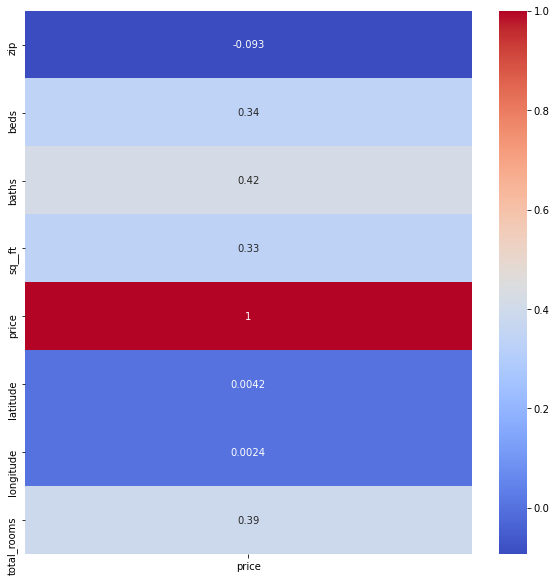

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['price']], annot=True, cmap='coolwarm')

In [30]:
# Using a quick correlation and a heatmap with all variables, I don't see anythign immediately that can help us
# Total rooms has a correlation of .39 to price
# sq__ft has a correlation of .33 to price
# my assumption of zip code being a correlator is actually bad, because it has a corr value of -0.093
# Baths seems to be a stronger correlator of price than total rooms
# We can make an assumption that each bathroom may be associated with a bedroom or standalone

In [31]:
# What happens when i include dummy variables for city?

In [32]:
dummy_df = pd.get_dummies(df)

In [33]:
dummy_df.head(1)

,zip,beds,baths,sq__ft,price,latitude,longitude,total_rooms,street_1 KENNELFORD CIR,street_10 SEA FOAM CT,...,state_CA,type_Condo,type_Multi-Family,type_Residential,type_Unkown,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,95838,2,1,836,59222,38.631913,-121.434879,3,0,0,...,1,0,0,1,0,0,0,0,0,1


In [34]:
dummy_df.corr()[['price']].sort_values(by='price', ascending=False).head(5)

,price
price,1.000000
baths,0.416208
total_rooms,0.387460
beds,0.342024
sq__ft,0.333897


In [35]:
#plt.figure(figsize=(10,300));
#sns.heatmap(dummy_df.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm');
#plt.savefig('df_corr.png');

In [36]:
# Okay, so according to the correlations, the first 5 dataframe, and the massive output picture if you'd like to look at
# We should focus on
# baths OR total rooms OR bed
## all of those numbers mean the same thing and we should only consider one of them
# sq__ft

In [ ]:
# For my evaluation, I am going to set up two datasets
# X_simple = ['total_rooms', sq__ft]
# X_everything = dummy_df.drop('baths', 'beds')
# y =['price']

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [55]:
# SSE = Sum of Squares Error

In [101]:
X_simple = df.loc[:,['total_rooms', 'sq__ft']]
#X_everything = dummy_df.drop(['baths', 'beds'], axis=1)
y = df['price']

In [52]:
X_simple.head(2)

,total_rooms,sq__ft
0,3,836
1,4,1167


In [54]:
y.head(2)

0    59222
1    68212
Name: price, dtype: int64

In [ ]:
# A: Using a Linear Regression Model

In [57]:
lr_simple = LinearRegression()

In [58]:
lr_simple.fit(X=X_simple, y=y)

LinearRegression()

### 6. Interpret the intercept. Interpret the slope.

In [ ]:
# A: Looking at intercept attribute

In [61]:
lr_simple.intercept_

115698.00517258947

In [70]:
# Source : https://www.kite.com/python/answers/how-to-print-a-numpy-array-without-scientific-notation-in-python
np.set_printoptions(suppress=True) # This is to see the number as a whole and not scientific notation
lr_simple.coef_ 

array([19758.4398132 ,    19.63034841])

In [ ]:
# The lr_simple intercept is saying  that its starting price for houses in the Sacrarmento area
# is around 115,000 USD

In [93]:
X_simple.columns

Index(['total_rooms', 'sq__ft'], dtype='object')

In [ ]:
# The slopes of the multivarate linear regression say that the total rooms have a much larger effect on the pricing than the sq__ft do

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [104]:
# Source: https://stats.stackexchange.com/questions/244017/what-is-the-difference-between-prediction-and-inference#:~:text=Inference%3A%20Given%20a%20set%20of,from%20a%20set%20of%20outcomes.
'''
Inference: Given a set of data you want to infer how the output is generated as a function of the data.

Prediction: Given a new measurement, you want to use an existing data set to build a model that reliably 
chooses the correct identifier from a set of outcomes.

Inference: You want to find out what the effect of Age, Passenger Class and, Gender has on surviving the Titanic Disaster. 
You can put up a logistic regression and infer the effect each passenger characteristic has on survival rates.

Prediction: Given some information on a Titanic passenger, 
you want to choose from the set {lives,dies} and be correct as often as possible. 
(See bias-variance tradeoff for prediction in case you wonder how to be correct as often as possible.)
''';

In [ ]:
# A: For the lr_simple model
# We can infer that there is a relationship between price and total rooms, and our coefficents say 

# Then, we can set up a prediction that a house in SACRAMENTO with an x amount of rooms would be predicted to have a 
# Y price

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [105]:
# A:

# We calculate residuials by using our lr_simple model to predict y values, then find the difference between predicted and actual+

In [107]:
# We pass in X because we are predicting y
preds_simple = lr_simple.predict(X_simple)

In [108]:
residuials_simple = y - preds_simple

Text(0.5, 0, 'Index')

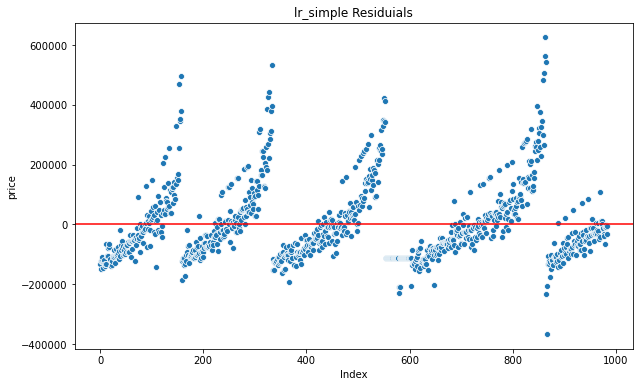

In [147]:
plt.figure(figsize=(10,6))
plt.title('lr_simple Residuials')
plt.axhline(color = 'red')
sns.scatterplot(range(len(residuials_simple)), residuials_simple)
plt.xlabel('Index')

In [121]:
# What the heck is this? It looks like it has a log relationship

# What happens if we sort the predicted y_values?

In [131]:
residuials_simple_sorted = pd.Series(residuials_simple.sort_values())

In [132]:
residuials_simple_sorted

866   -366294.972306
865   -232697.644052
579   -229351.644052
580   -209593.204239
581   -209593.204239
           ...      
861    506801.994827
334    533354.790505
864    544409.383133
862    564301.994827
863    624992.916135
Name: price, Length: 985, dtype: float64

Text(0.5, 0, 'Index')

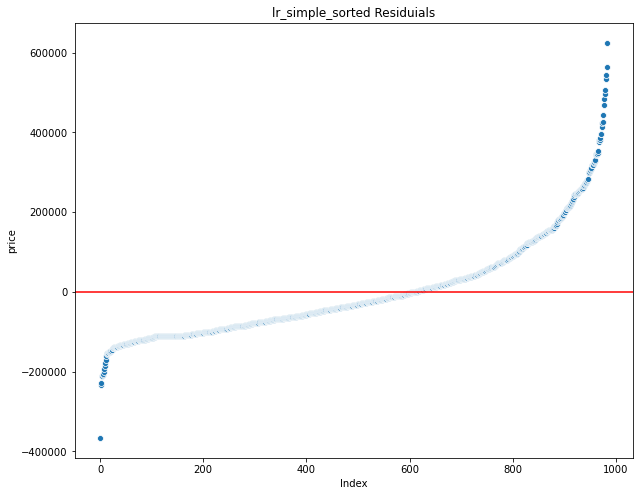

In [139]:
plt.figure(figsize=(10,8))
plt.title('lr_simple_sorted Residuials')
sns.scatterplot(range(len(residuials_simple_sorted)), residuials_simple_sorted)
plt.xlabel('Index')

In [136]:
# Sorting the values seems to take away any kind of information they had, but what if we use a log for our y scale?

In [137]:
# Plotting the orignal, unsorted data, but using a log scale:

Text(0.5, 0, 'Index')

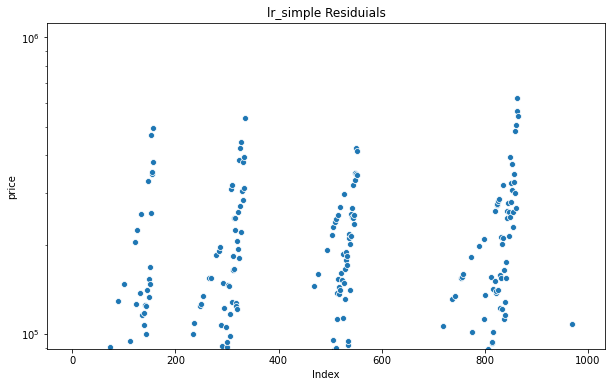

In [151]:
plt.figure(figsize=(10,6))
plt.title('lr_simple Residuials')
plt.axhline(color = 'red')
sns.scatterplot(range(len(residuials_simple)), residuials_simple)
plt
plt.yscale('log')
plt.xlabel('Index')

In [152]:
# I don't think the log tells us anything other than dividing the houses into 5 containers

In [ ]:
# I want to explore with the original plot because it reminds me of tan(x)

In [155]:
# To explore this, we are going to look at a new method called curve_fit
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [154]:
from scipy.optimize import curve_fit

In [157]:
X_simple.columns

Index(['total_rooms', 'sq__ft'], dtype='object')

In [182]:
# Let's see if we can superimpose our predictions onto the orignal graphs:

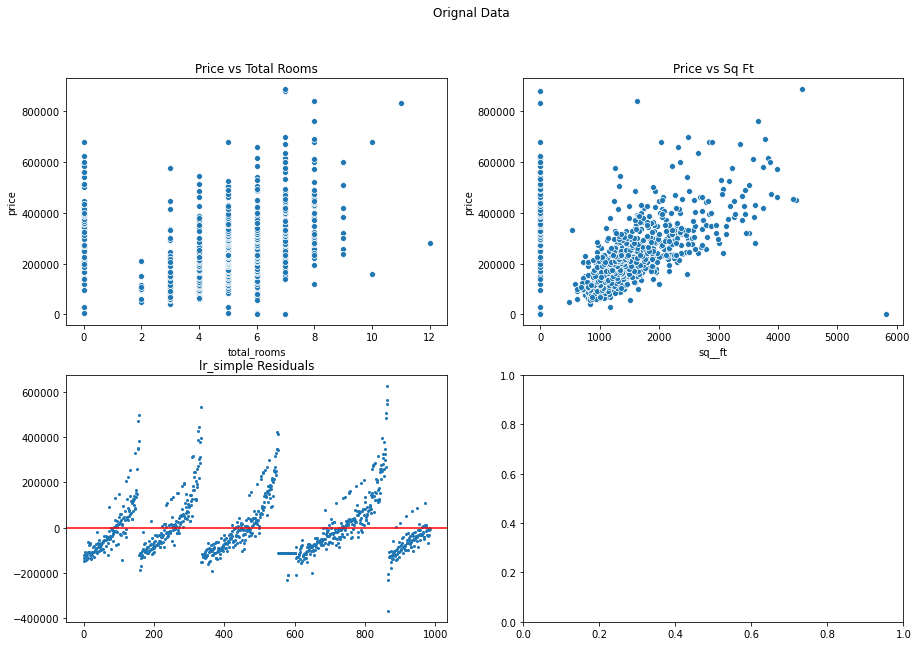

In [203]:
f, axs = plt.subplots(2, 2,figsize=(15,10))
plt.suptitle('Orignal Data')
plt.subplot(2, 2, 1)
sns.scatterplot(X_simple['total_rooms'], y)
plt.title('Price vs Total Rooms')
plt.subplot(2, 2, 2)
sns.scatterplot(X_simple['sq__ft'], y)
plt.title('Price vs Sq Ft')
plt.subplot(2, 2, 3)
plt.title('lr_simple Residuals')
plt.plot(residuials_simple, 'o', markersize=2)
plt.axhline(color = 'red')

In [180]:
# Okay, the obvious weird trend of data having a log looking relationship comes from the total rooms vs price variable

In [181]:
# It makes no sense to curvefit a tan(x)

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [204]:
# A:

# We did this earlier during variable exploration

In [205]:
X_everything = dummy_df.drop(['baths', 'beds'], axis=1)

In [206]:
X_everything.head()

,zip,sq__ft,price,latitude,longitude,total_rooms,street_1 KENNELFORD CIR,street_10 SEA FOAM CT,street_100 CHELSEA CT,street_100 CRYSTALWOOD CIR,...,state_CA,type_Condo,type_Multi-Family,type_Residential,type_Unkown,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,95838,836,59222,38.631913,-121.434879,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,95823,1167,68212,38.478902,-121.431028,4,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,95815,796,68880,38.618305,-121.443839,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,95815,852,69307,38.616835,-121.439146,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,95824,797,81900,38.519470,-121.435768,3,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [ ]:
# A:

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [ ]:
# A:

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [ ]:
# A:

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [ ]:
#  A:

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [ ]:
# A:

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A: